# Figure 4b. Variant set -level Excess-of-overlap (EOO) analysis in bulk region.

Variant set-level Excess-of-overlap (EOO) analysis of the 95% CoS-gene links across 3 different brain cortical regions and CD14+/CD16- bulk monocytes against the gold standard element-gene links from aggregated CRISPR (dCas9) and STING-seq datasets. Red asterisks denotes significant enrichment based on EOO test adjusted for multiple testing (FDR<5% using Bonferroni correction).

In [1]:
library(ggplot2)
library(ggsci)
library(ggpattern)
data <- readRDS("data/Figure_4b_bulk_EOO.rds")
sdtimes <- 1.96
colors <- c("#2171B5", "#5CA7CE", "#A6CEE3", "#E78AC3")
p1 <- ggplot(data, aes(x = celltype, y = enrichment, fill = celltype, pattern = cate)) +
  geom_bar_pattern(
    aes(pattern = cate),
    stat = "identity",
    position = position_dodge(width = 0.7),
    width = 0.7,
    color = "black", # Solid border
    pattern_fill = "grey40", # Pattern color
    pattern_angle = 45, # Angle of the dashed line
    pattern_density = 0.05, # Spacing of the dashed line
    pattern_spacing = 0.05 # Line spacing
  ) +
  geom_text(
    data = subset(data, P <= 0.05/3 & enrichment > 1),
    aes(label = "*", y = enrichment + sdtimes * sd + 0.03, group = cate),
    vjust = 0, color = "#F94144", size = 10, position = position_dodge(0.7)
  ) +
  scale_pattern_manual(values = c("none", "stripe")) +
  geom_errorbar(aes(ymin = enrichment - sdtimes*sd, ymax = enrichment + sdtimes*sd), width = 0.2, position = position_dodge(0.7), linewidth = 1) +
  geom_hline(yintercept = 1, linetype = "dashed", color = "grey20", linewidth = 1)  + 
  # scale_fill_brewer(palette = "Set2") +
  scale_fill_manual(values = colors) +
  labs(
    title = "",
    x = "",
    y = "Excess Overlap"
  ) +
  ylim(c(0,4.5)) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(size = 0, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 0),
    axis.title.y = element_text(size = 24),
    axis.text.y = element_text(size = 20, margin = margin(r = 0), angle = 90, hjust = 0.5, vjust = 0),
    axis.text.x = element_text(size = 20, margin = margin(t = 0)),
    legend.position = "inside",
    legend.justification = c(0.1, 0.9),
    legend.title = element_text(size = 0),
    legend.text = element_text(size = 20),
    legend.spacing.y = unit(1.5, "cm"),
    panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5),
    panel.grid.major = element_blank(),      # Remove major grid lines
    panel.grid.minor = element_blank(),      # Remove minor grid lines
  ) +
  guides(fill = "none",
         pattern = guide_legend(
           override.aes = list(
             fill = c("white", "lightgrey"),  # Adjust background color for the legend
             color = "black"                 # Keep border color
           )
         )
  )


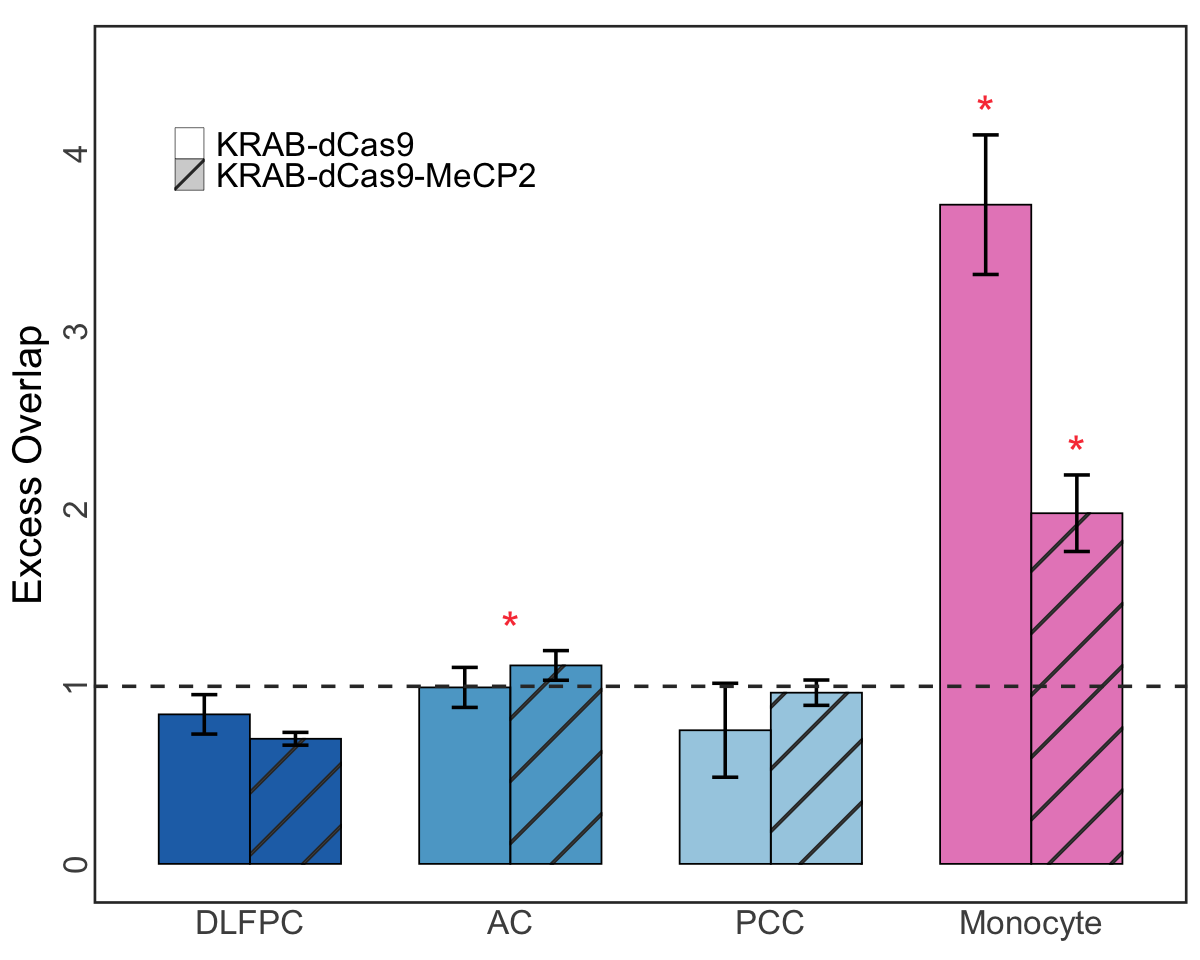

In [2]:
options(repr.plot.width = 10, repr.plot.height = 8)
p1